In [77]:
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [78]:
beer_info = pd.read_csv('beer_info_clean.csv', index_col = None)
beer_info.head(10)

,state,beer_rank,beer_name,beer_style,brewer,review_count,overall_score,style_score,wgt_avg,abv,est_cal,mean,ibu,beer_desc,beer_img
0,ALABAMA,1,Good People El Gordo Imperial Stout,Imperial Stout,Good People Brewing Company,15,99.0,90.0,3.89,13.90,417.0,4.13,65.0,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
1,ALABAMA,2,Straight To Ale Laika Russian Imperial Stout -...,Imperial Stout,Straight To Ale,53,98.0,72.0,NaN,11.70,351.0,NaN,NaN,NaN,http://res.cloudinary.com/ratebeer/image/uploa...
2,ALABAMA,3,Straight To Ale Laika Russian Imperial Stout,Imperial Stout,Straight To Ale,55,97.0,71.0,NaN,NaN,74.0,NaN,NaN,"Second offering from the ""Right to Brew"" serie...",http://res.cloudinary.com/ratebeer/image/uploa...
3,ALABAMA,4,Avondale Barrel Aged Brett Saison,Saison,Avondale Brewing Company,10,97.0,95.0,3.69,7.50,225.0,4.01,NaN,This brew is our regular Saison aged in french...,http://res.cloudinary.com/ratebeer/image/uploa...
4,ALABAMA,5,Straight To Ale Laika Russian Imperial Stout -...,Imperial Stout,Straight To Ale,48,96.0,58.0,NaN,11.80,354.0,NaN,NaN,Straight To Ale Barrel Aged Laika Russian Impe...,http://res.cloudinary.com/ratebeer/image/uploa...
5,ALABAMA,6,Good People Snake Handler,Imperial IPA,Good People Brewing Company,119,96.0,84.0,NaN,9.30,279.0,NaN,103.0,"A big, joyous celebration of all things hoppy ...",http://res.cloudinary.com/ratebeer/image/uploa...
6,ALABAMA,7,Straight To Ale Gorillanaut Imperial IPA,Imperial IPA,Straight To Ale,29,96.0,82.0,3.66,9.00,270.0,3.76,275.0,"The bigger, badder brother to our flagship Mon...",http://res.cloudinary.com/ratebeer/image/uploa...
7,ALABAMA,8,Straight To Ale Velvet Evil,Old Ale,Straight To Ale,25,95.0,91.0,3.65,13.00,390.0,3.76,NaN,A variant of the same old ale used as the base...,http://res.cloudinary.com/ratebeer/image/uploa...
8,ALABAMA,9,Good People Fatso Imperial Stout,Imperial Stout,Good People Brewing Company,36,95.0,47.0,3.61,8.50,255.0,3.69,NaN,First debuted at the 2009 Magic City Brewfest ...,http://res.cloudinary.com/ratebeer/image/uploa...
9,ALABAMA,10,Straight To Ale Monkeys Uncle IIPA,Imperial IPA,Straight To Ale,21,94.0,73.0,3.62,7.75,232.0,3.74,NaN,This Imperial IPA is packed with hoppy goodnes...,http://res.cloudinary.com/ratebeer/image/uploa...


In [11]:
beer_info.count()

state            1275
beer_rank        1275
beer_name        1275
beer_style       1275
brewer           1275
review_count     1275
overall_score    1267
style_score      1230
wgt_avg           533
abv               629
est_cal           846
mean              533
ibu               597
beer_desc        1150
beer_img         1275
dtype: int64

In [47]:
a = beer_info['overall_score']
overall_score = a[a.notnull()]

b = beer_info['style_score']
style_score = b[b.notnull()]

(array([   4.,    0.,    1.,    1.,    3.,    1.,    2.,    2.,    4.,
          15.,    7.,   10.,    5.,   13.,   17.,    8.,   26.,   70.,
         115.,  571.,  392.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105]),
 <a list of 21 Patch objects>)

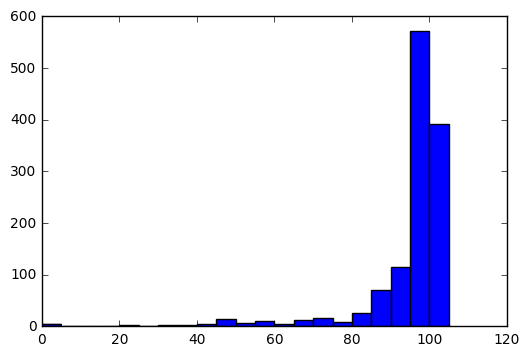

In [46]:

bins = np.arange(0,106, 5)
plt.hist(overall_score, bins=bins)


(array([   8.,   13.,   16.,   27.,   32.,   36.,   44.,   76.,  127.,
         403.,  392.]),
 array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102]),
 <a list of 11 Patch objects>)

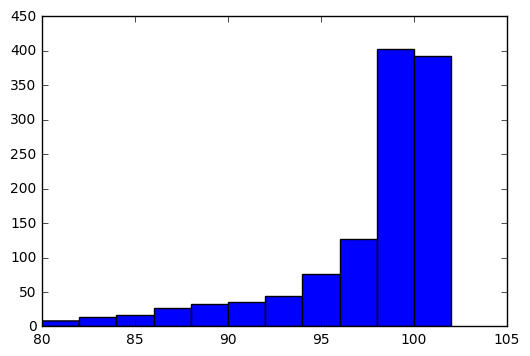

In [45]:
bins = np.arange(80,103, 2)
plt.hist(overall_score, bins=bins)


(array([   0.,    2.,    2.,    3.,   11.,    9.,    6.,    8.,   16.,
          29.,   12.,   12.,   22.,   24.,   34.,   48.,   61.,   85.,
         163.,  495.,  188.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105]),
 <a list of 21 Patch objects>)

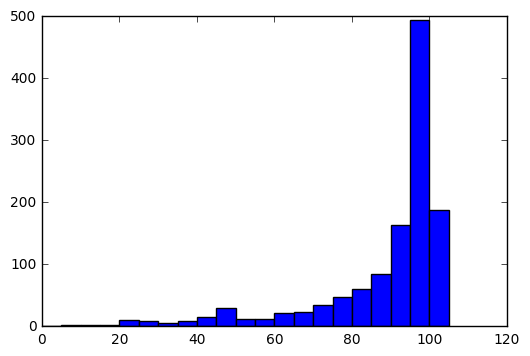

In [48]:
bins = np.arange(0,106, 5)
plt.hist(style_score, bins=bins)



(array([  13.,   31.,   29.,   36.,   37.,   51.,   69.,  107.,  136.,
         295.,  188.]),
 array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102]),
 <a list of 11 Patch objects>)

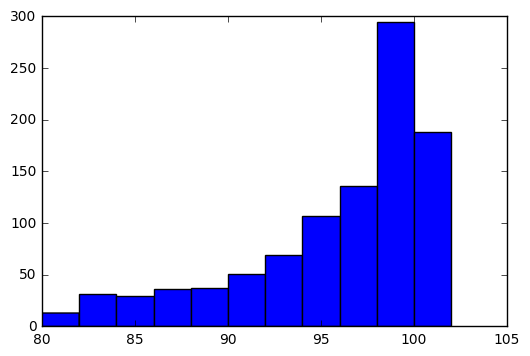

In [50]:
bins = np.arange(80,103, 2)
plt.hist(style_score, bins=bins)

(array([ 643.,  182.,   96.,   72.,   41.,   40.,   23.,   11.,   18.,
          15.,   12.,    8.,   10.,    5.,    5.,    7.,    6.,    4.,
           5.,    5.,    4.,    4.,    5.,    2.,    0.,    2.,    3.,
           5.,    1.,    1.,    3.,    1.,    4.,    1.,    1.,    2.,
           1.,    0.,    0.,    1.,    0.,    2.,    2.,    1.,    0.,
           0.,    2.,    1.,    1.,    1.,    2.,    1.,    1.,    0.,
           0.,    1.,    3.,    0.,    0.,    0.,    0.,    2.,    1.,
           0.,    0.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([   5,   55,  105,  155,  205,  255,  305,  355,  405,  455,  505,
         555,  605,  655,  705,  755,  805,  855,  905,  955, 1005, 1055,
        1105, 1155, 1205, 1255, 1305, 1355, 1405, 1455, 1505, 1555, 1605,
        1655, 1705, 1755, 1805, 1855, 1905, 1955, 2005, 205

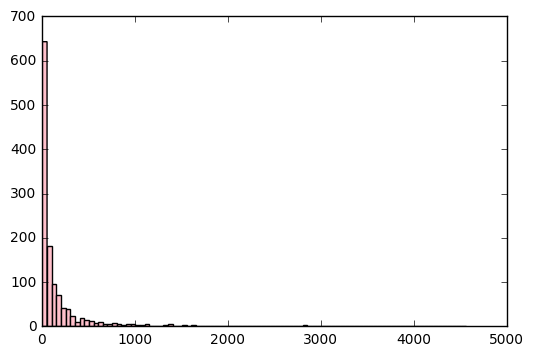

In [76]:
c = beer_info['review_count']
plt.hist(c,bins = np.arange(c.min(), c.max(), 50), color = 'pink')

Index([u'review_count', u'overall_score', u'style_score', u'wgt_avg', u'abv',
       u'est_cal', u'mean', u'ibu'],
      dtype='object')


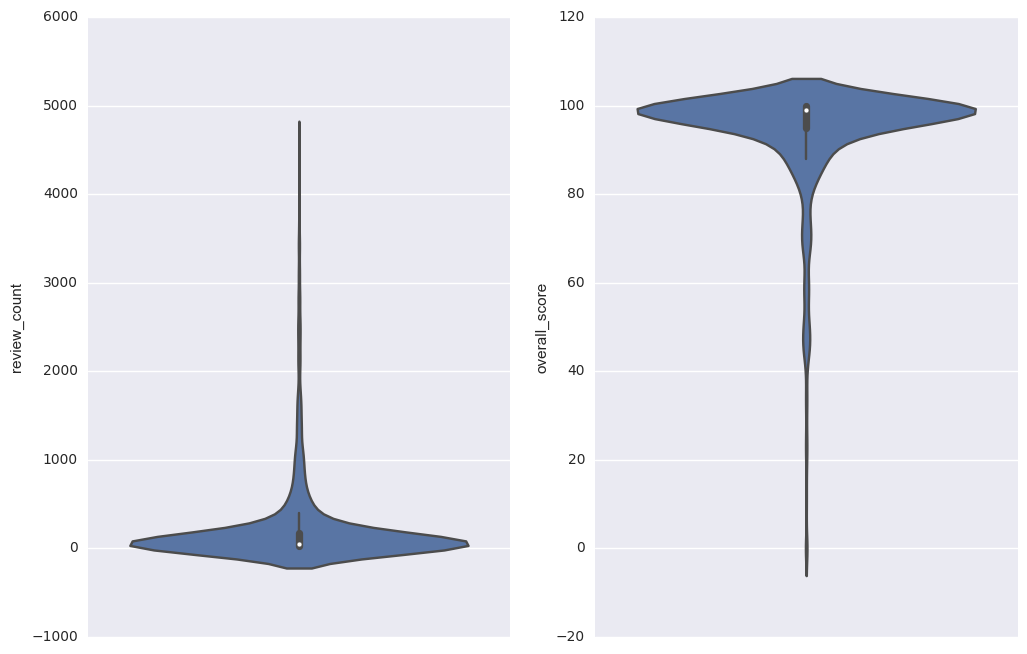

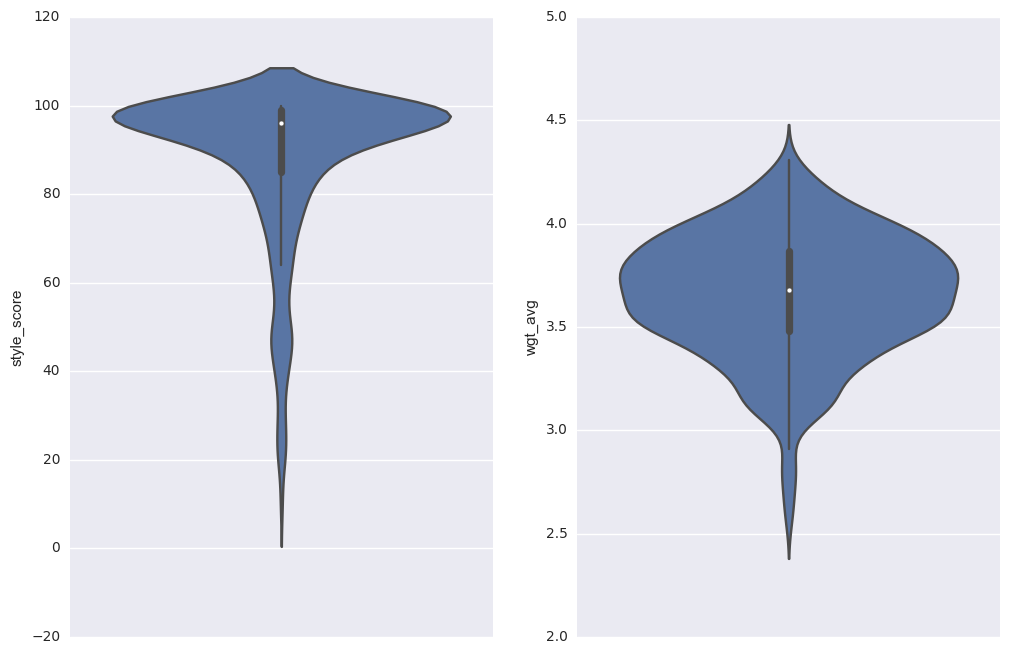

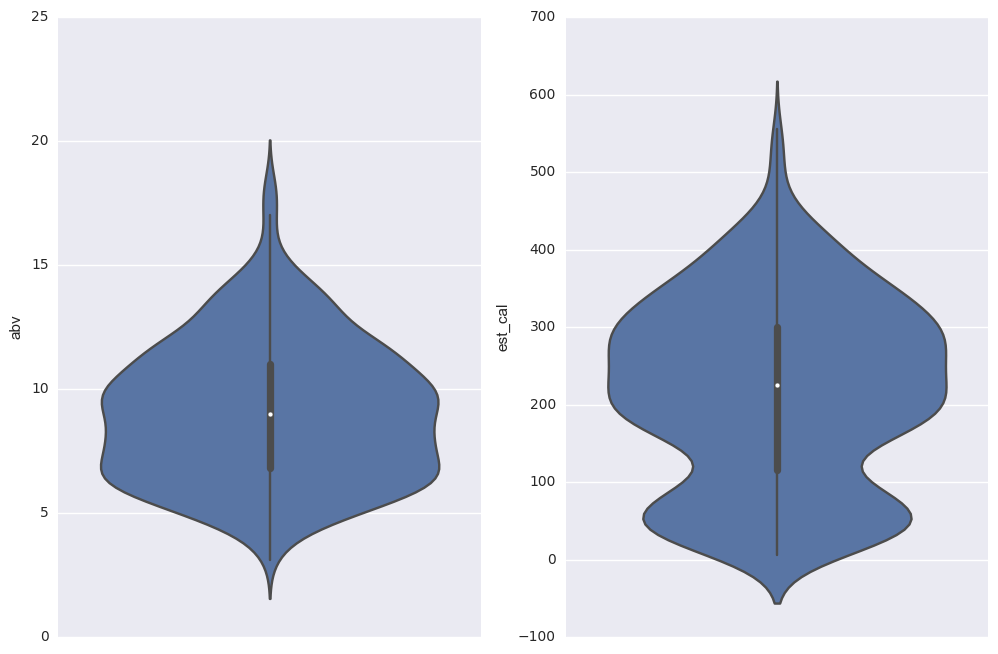

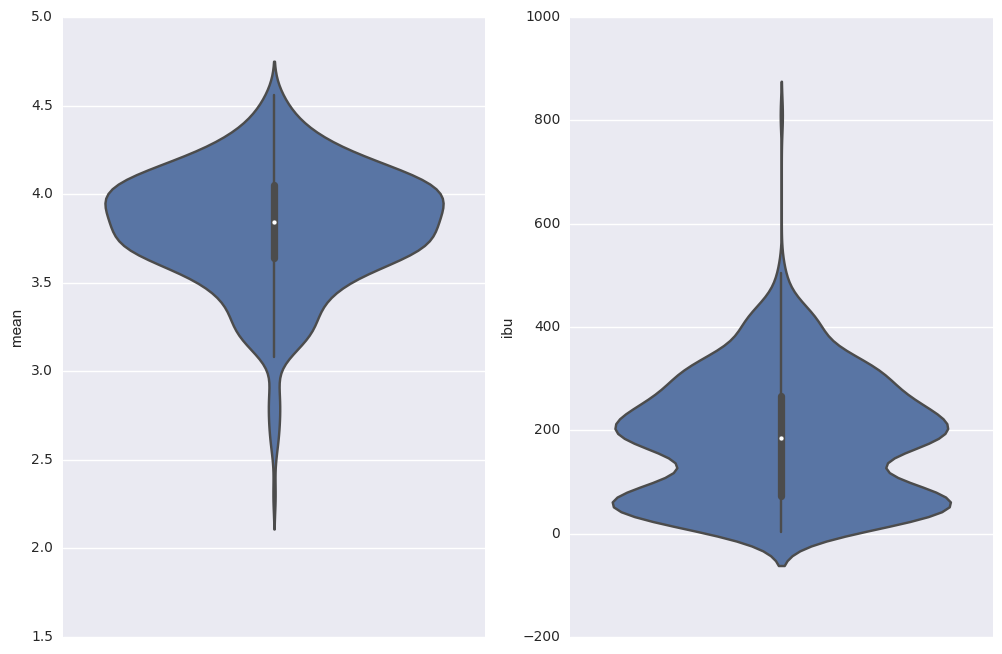

In [98]:
col_names = beer_info.columns[5:13] # continuous columns
n_rows = len(col_names) % 2 + len(col_names) / 2 
n_cols = 2
print col_names
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=col_names[i*n_cols+j], data=beer_info.iloc[:,5:13], ax=ax[j])
#sns.violinplot(y = ['style_score'], data = beer_info)

In [140]:
style_count = len(beer_info['beer_style'].unique())
print style_count

brewer_count = len(beer_info['brewer'].unique())
print brewer_count

58
335


In [138]:
brewer_counts = beer_info['brewer'].value_counts()
pd.DataFrame({'count': brewer_counts})


,count
Toppling Goliath,22
Three Floyds Brewing Company,22
Hill Farmstead Brewery,21
Westbrook Brewing,21
Prairie Artisan Ales,21
Superstition Meadery,17
Nebraska Brewing Company,16
Dogfish Head Brewery,15
Wicked Weed Brewing,15
Trillium Brewing Company,14


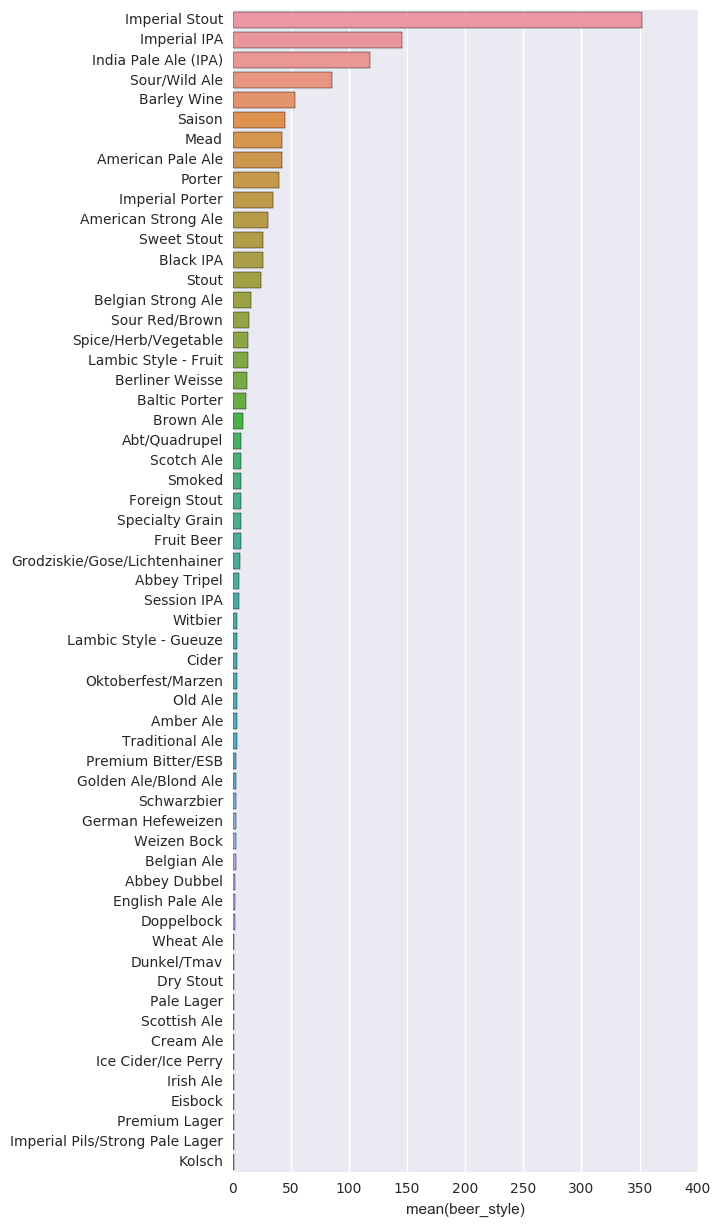

In [149]:
f, ax = plt.subplots(figsize=(6, 15))
# side note: df.col.count is a series w/ index being the column
style_sns = sns.barplot(x=beer_info.beer_style.value_counts(), y=beer_info.beer_style.value_counts().index)
#for p in style_sns.patches:
#        style_sns.annotate('{:.1f}'.format(p.get_width()), (p.get_y()+50, p.get_width()+.1))

In [147]:
style_counts = beer_info['beer_style'].value_counts()
pd.DataFrame({'count': style_counts})


,count
Imperial Stout,352
Imperial IPA,146
India Pale Ale (IPA),118
Sour/Wild Ale,85
Barley Wine,54
Saison,45
Mead,42
American Pale Ale,42
Porter,40
Imperial Porter,35
